In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline
from numpy.random import randn

In [2]:
housing_df = pd.read_excel ('HousingDetails.xlsx')
housing_df.head()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                  41          880           129.0   
1    -122.22     37.86                  21         7099          1106.0   
2    -122.25     37.85                  52         1627           280.0   
3    -122.25     37.85                  52          919           213.0   
4    -122.25     37.84                  52         2535           489.0   

   population  households  median_income  median_house_value ocean_proximity  
0         322         126         8.3252              452600        NEAR BAY  
1        2401        1138         8.3014              358500        NEAR BAY  
2         565         259         3.8462              342200        NEAR BAY  
3         413         193         4.0368              269700        NEAR BAY  
4        1094         514         3.6591              299200        NEAR BAY

In [3]:
housing_df.tail()

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
18560    -121.09     39.48                  25         1665           374.0   
18561    -121.21     39.49                  18          697           150.0   
18562    -121.22     39.43                  17         2254           485.0   
18563    -121.32     39.43                  18         1860           409.0   
18564    -121.24     39.37                  16         2785           616.0   

       population  households  median_income  median_house_value  \
18560         845         330         1.5603               78100   
18561         356         114         2.5568               77100   
18562        1007         433         1.7000               92300   
18563         741         349         1.8672               84700   
18564        1387         530         2.3886               89400   

      ocean_proximity  
18560          INLAND  
18561          INLAND  
18562          INLAND  
18563          INLAND  
18564          INLAND

## Statistical Calculations of the Data

In [4]:
housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  18565.000000  18565.000000        18565.000000  18565.000000   
mean    -119.570116     35.633888           28.615890   2634.033827   
std        2.002922      2.137014           12.564224   2195.915548   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1442.000000   
50%     -118.500000     34.260000           29.000000   2123.000000   
75%     -118.010000     37.710000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    18376.000000  18565.000000  18565.000000   18565.000000   
mean       537.711199   1426.223108    499.450902       3.867012   
std        424.125849   1142.570832    384.553175       1.895988   
min          2.000000      3.000000      2.000000       0.499900   
25%        295.000000    786.000000    279.000000       2.561200   
50%        434.000000   1166.000000    408.000000       3.534100   
75%        646.000000   1725.000000    603.000000       4.741100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        18565.000000  
mean        206617.794991  
std         115447.104881  
min          14999.000000  
25%         119300.000000  
50%         179400.000000  
75%         264400.000000  
max         500001.000000

Housing Statistic Summary

1. Mean is greater than the 50% percentile value all values. So most of the data could be right / positively skewed.

2. Total rooms, total bedrooms, population, households, median house value 75th percentile and max difference is huge. This indicates outliers.

In [5]:
print(housing_df.shape)

(18565, 10)


Housing file has 10 columns and 18565 rows of data

In [6]:
print ('Housing Info')
print ('\n',housing_df.info())

Housing Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18376 non-null  float64
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(4), int64(5), object(1)
memory usage: 1.4+ MB

 None


Housing data has 5 integer data columns, 4 float type data and one classification (discrete) data.

Total bedrooms has null / missing entries.

There are no null / missing entries for all other columns other than Total bedrooms.

In [7]:
print ('Housing dataset analysis for unique values \n',housing_df.nunique())

Housing dataset analysis for unique values 
 longitude               840
latitude                859
housing_median_age       52
total_rooms            5721
total_bedrooms         1882
population             3759
households             1768
median_income         11968
median_house_value     3759
ocean_proximity           5
dtype: int64


## Target Value Analysis 

In [8]:
print ('Housing Median House Value analysis : \n',housing_df['median_house_value'].describe())

Housing Median House Value analysis : 
 count     18565.000000
mean     206617.794991
std      115447.104881
min       14999.000000
25%      119300.000000
50%      179400.000000
75%      264400.000000
max      500001.000000
Name: median_house_value, dtype: float64


Target variable Median house value is a contineous variable which ranges from 14999 to 500001.

Mean is greater than the median 50% th percentive value, which indicates that the value is right / positively skewed.

## Data Visualization:

## 1. Check for null values

<AxesSubplot:>

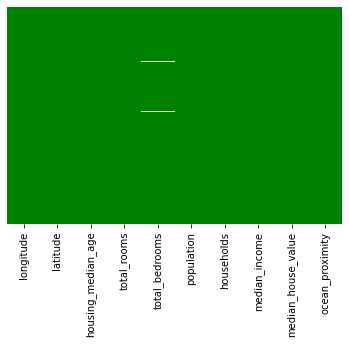

In [9]:
sns.heatmap(housing_df.isnull(),cbar=False,yticklabels=False,cmap='ocean')

Total bedrooms column has null / missing values.

If the data has null values then we will have to work on cleaning the data to either drop the null values or replace any of them.

We may end up building a biased machine learning model which will lead to incorrect results if the missing values are not handled properly.

Missing data can lead to a lack of precision in the statistical analysis.

Next step is to drop any unwanted columns that do not affect the target values. In this data set we may or maynot drop any columns. Further analysis required on this.

Format to drop data
df = df.drop(['col1 name', 'col2_name],axis=1)

## 2. Correlation Data Analysis

<AxesSubplot:>

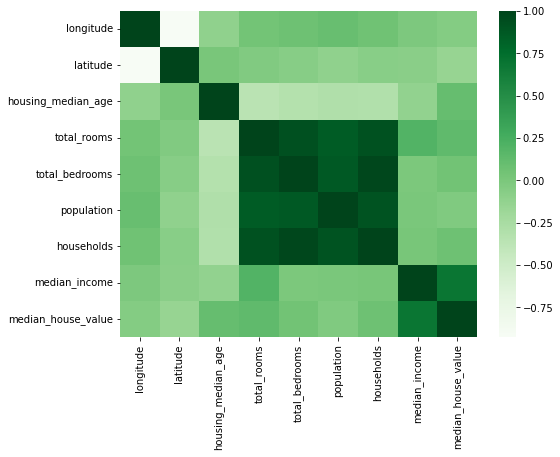

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(housing_df.corr(), cmap='Greens')

Dark color cells indicate high level of +ve correlation and light color cells indicate high level of -ve correlation

<AxesSubplot:>

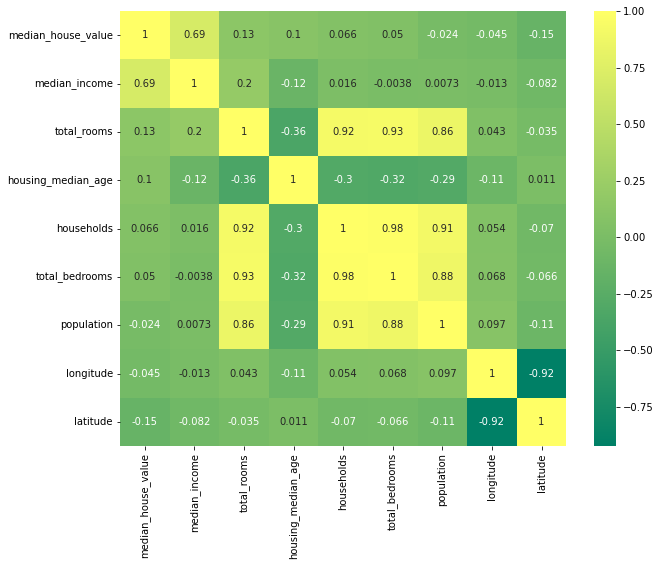

In [11]:
#median_house_value correlation matrix
length = len(housing_df.columns)
cols = housing_df.corr().nlargest(length, 'median_house_value')['median_house_value'].index
housing_CorrMatrix = housing_df[cols].corr()
plt.figure(figsize = (10,8))
sns.heatmap(housing_CorrMatrix, annot=True, cmap='summer')

Housing - data correlation analysis

1. Median House Value is highly positively correlated with median income and households.
2. Median House Value is minutely negatively correlated with population.
3. population is highly positively correlated with households, total bedrooms and total rooms.
4. housing median age is slightly negatively correlated to total rooms, total bedrooms, population.

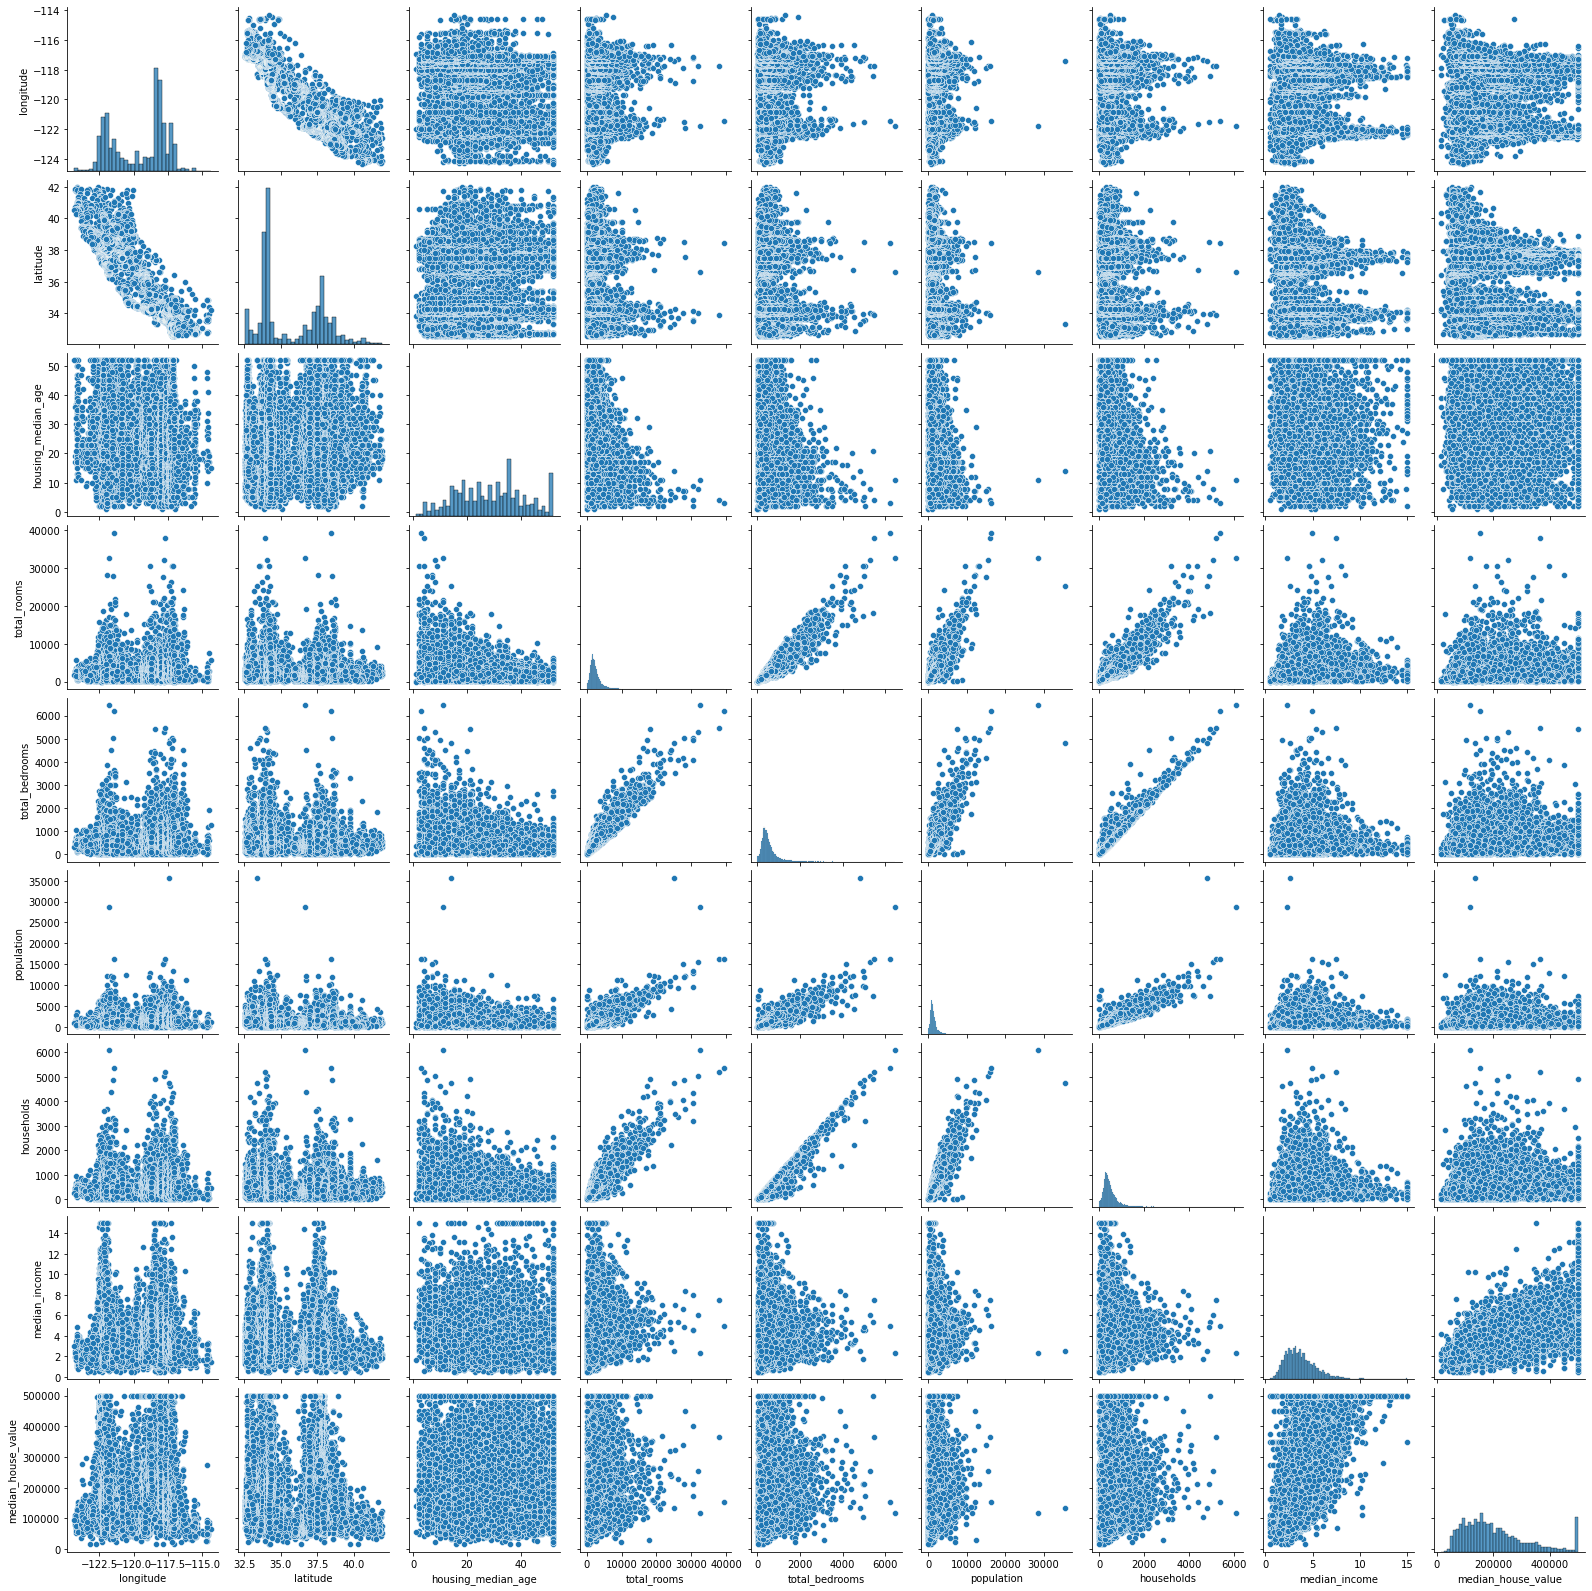

In [12]:
sns.pairplot(housing_df)

## 3. Finding Outliers

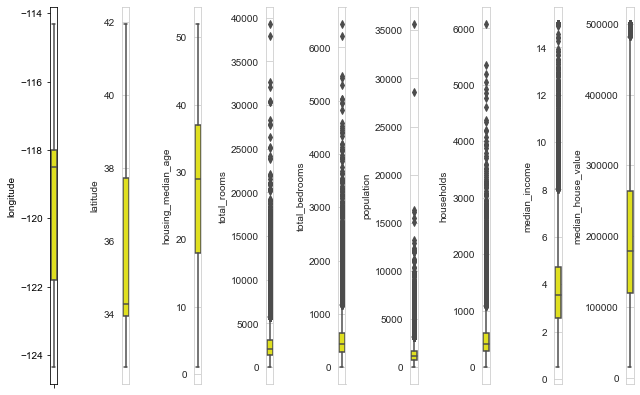

In [13]:
col_names = housing_df.columns.values
num_of_columns = len(housing_df.columns)
num_of_rows = len(housing_df.columns)
num_of_rows, num_of_columns, len(col_names), col_names
plt.figure(figsize=(num_of_columns, 6*num_of_rows))

for i in range(0,len(col_names)-1):
    plt.subplot(num_of_rows + 1, num_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(y=housing_df[col_names[i]], color='yellow', orient='v')
    plt.tight_layout()
    

Housing data outlier identifications:

1. housing median age shows no outliners.
2. Median house value shows only minimum right tail outliers.
3. Total income, total bedrooms, population, households and median income shows heavy right tail outliers and no outliers on left tail.

## 4. Analyse Distribution Skewness

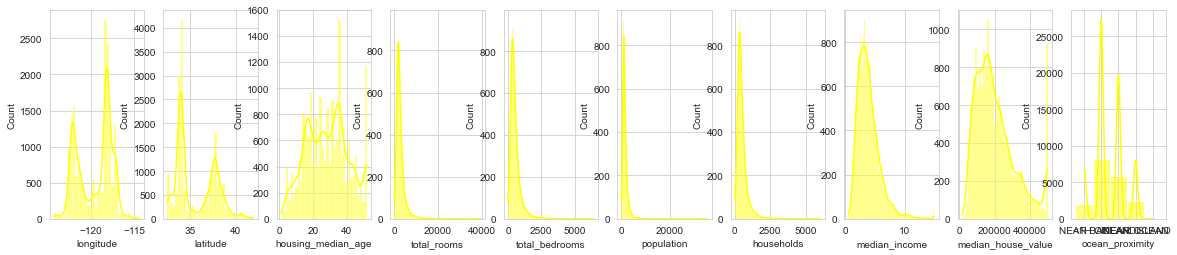

In [14]:
col_names = housing_df.columns.values
num_of_columns = len (housing_df.columns)
num_of_rows = len(housing_df.columns)

plt.figure(figsize=(2*num_of_columns,5*num_of_rows))
for i in range(0,len(col_names)):
    plt.subplot(num_of_rows + 1,num_of_columns,i+1)
    sns.histplot(x=housing_df[col_names[i]],kde=True, color='yellow')

Analyse Distribution Skewness

1. housing median age and ocean proximity are multimodal data.
2. total rooms, total bedrooms, precision, households and median income are highly right / positively skeweed.
3. median house value shows multimodal and is also highly right / positively skeweed.

<AxesSubplot:title={'center':'Median House Value Analysis'}, xlabel='Median House Value', ylabel='Total Rooms'>

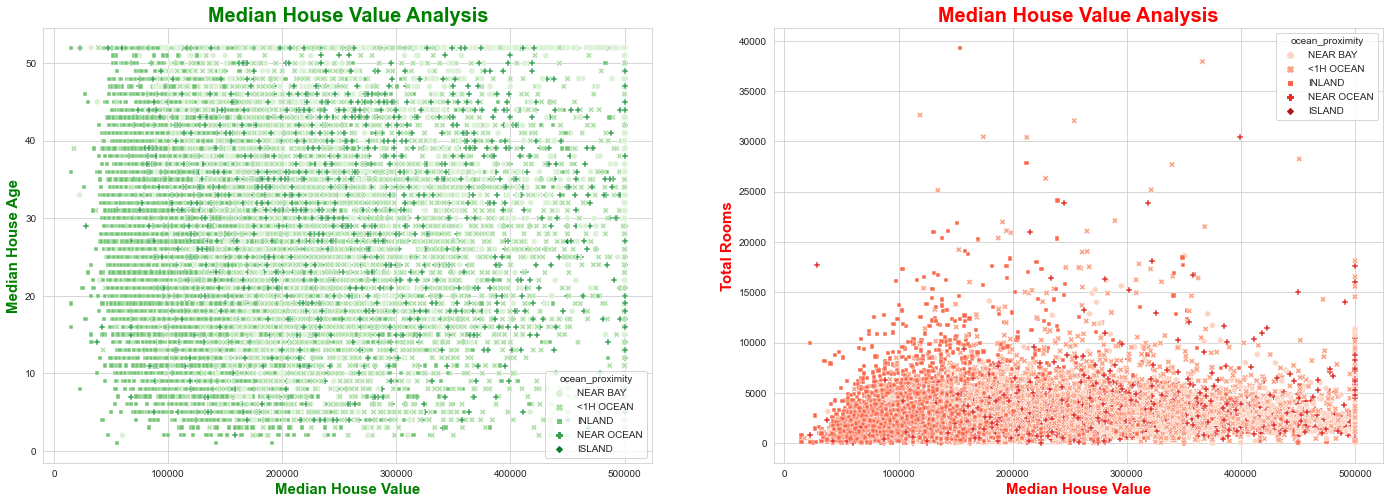

In [15]:
plt.figure(figsize=(24,8))
ax = plt.subplot(1,2,1)
ax.set_title('Median House Value Analysis', color='green', fontweight='bold', fontsize=20)
ax.set_xlabel('Median House Value', color='green', fontweight='bold', fontsize=15)
ax.set_ylabel('Median House Age', color='green', fontweight='bold', fontsize=15)
sns.scatterplot(data=housing_df, x='median_house_value', y='housing_median_age', hue='ocean_proximity', style='ocean_proximity', palette='Greens')
ax = plt.subplot(1,2,2)
ax.set_title('Median House Value Analysis', color='red', fontweight='bold', fontsize=20)
ax.set_xlabel('Median House Value', color='red', fontweight='bold', fontsize=15)
ax.set_ylabel('Total Rooms', color='red', fontweight='bold', fontsize=15)
sns.scatterplot(data=housing_df, x='median_house_value', y='total_rooms', hue='ocean_proximity', style='ocean_proximity', palette='Reds')


Median House Value Analysis

1.Graph shows that more houses are located near ocean.

2.Median House Age is equally distributed throughout the state California.

3.Houses / appartments Near Bay area are much costlier than the houses in Inland.

4.Island houses are the costliest ones.

5.Most of the houses / appartments holds less than 10000 rooms on average in Inland area.

6.Houses / appartments Near Bay or <1H Ocean holds less than 5000 rooms on average.

<AxesSubplot:title={'center':'Median House Value Analysis'}, xlabel='Median House Value', ylabel='Total Bedrooms'>

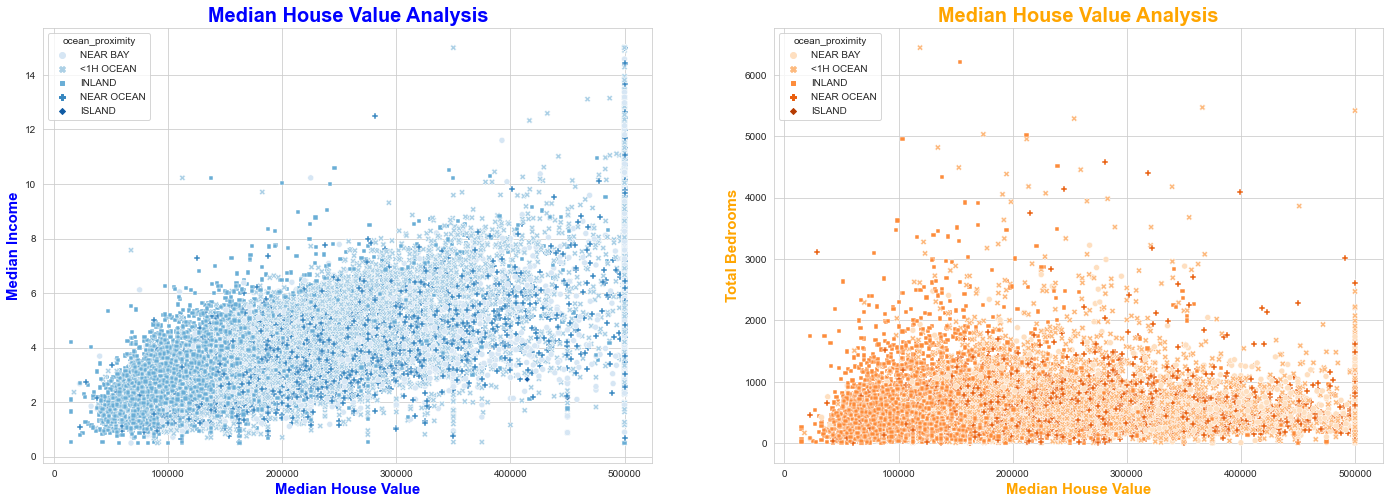

In [17]:
plt.figure(figsize=(24,8))
ax = plt.subplot(1,2,1)
ax.set_title('Median House Value Analysis', color='blue', fontweight='bold', fontsize=20)
ax.set_xlabel('Median House Value', color='blue', fontweight='bold', fontsize=15)
ax.set_ylabel('Median Income', color='blue', fontweight='bold', fontsize=15)
sns.scatterplot(data=housing_df, x='median_house_value', y='median_income', hue='ocean_proximity', style='ocean_proximity', palette='Blues')
ax = plt.subplot(1,2,2)
ax.set_title('Median House Value Analysis', color='orange', fontweight='bold', fontsize=20)
ax.set_xlabel('Median House Value', color='orange', fontweight='bold', fontsize=15)
ax.set_ylabel('Total Bedrooms', color='orange', fontweight='bold', fontsize=15)
sns.scatterplot(data=housing_df, x='median_house_value', y='total_bedrooms', hue='ocean_proximity', style='ocean_proximity', palette='Oranges')


<AxesSubplot:title={'center':'Total Bedrooms Analysis'}, xlabel='Latitude', ylabel='Longitude'>

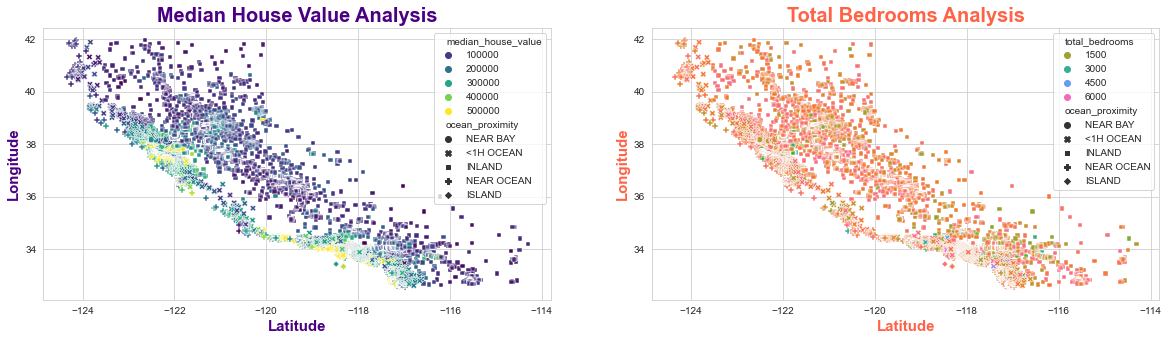

In [18]:
plt.figure(figsize=(20,5))
ax = plt.subplot(1,2,1)
ax.set_title('Median House Value Analysis', color='indigo', fontweight='bold', fontsize=20)
ax.set_xlabel('Latitude', color='indigo', fontweight='bold', fontsize=15)
ax.set_ylabel('Longitude', color='indigo', fontweight='bold', fontsize=15)
sns.scatterplot(data=housing_df, x='longitude', y='latitude', hue='median_house_value', style='ocean_proximity', palette='viridis')
ax = plt.subplot(1,2,2)
ax.set_title('Total Bedrooms Analysis', color='tomato', fontweight='bold', fontsize=20)
ax.set_xlabel('Latitude', color='tomato', fontweight='bold', fontsize=15)
ax.set_ylabel('Longitude', color='tomato', fontweight='bold', fontsize=15)
sns.scatterplot(data=housing_df, x='longitude', y='latitude', hue='total_bedrooms', style='ocean_proximity', palette='husl')


## 5. Now Analyse the null values

In [19]:
housing_df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        189
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Total bedrooms is an integer column, it contains 189 null values out of 18565 rows. All other columns are non null.

There are 2 primary ways of handling missing values:

Deleting the Missing values
    It is not a recommended method. It is one of the quick and dirty techniques one can use to deal with missing values.
        If the missing value is of the type Missing Not At Random (MNAR), then it should not be deleted.

        If the missing value is of type Missing At Random (MAR) or Missing Completely At Random (MCAR) then it can be deleted.

        The disadvantage of this method is one might end up deleting some useful data from the dataset.

        There are 2 ways one can delete the missing values:
            Delete entire row or
            Delete entire column


Imputing the Missing Values

    Replacing With Arbitrary Value
    Replacing With Mean
    Replacing With Mode
    Replacing With Median
    Replacing with previous value – Forward fill
    Replacing with next value – Backward fill
    Interpolation
        Single Variate (SimpleImputer)
        Multi Variate (IterativeImputer)
        KNNImputer
We have used Multivariate (Iterative Imputer)
 It actually builds a regression model with four features and one target and then makes predictions on any places where there are missing values. And those predictions are the imputed values.

In [20]:
columns = ['median_house_value', 'median_income', 'population', 'total_rooms', 'total_bedrooms']
X = housing_df[columns]
X

median_house_value  median_income  population  total_rooms  \
0                  452600         8.3252         322          880   
1                  358500         8.3014        2401         7099   
2                  342200         3.8462         565         1627   
3                  269700         4.0368         413          919   
4                  299200         3.6591        1094         2535   
...                   ...            ...         ...          ...   
18560               78100         1.5603         845         1665   
18561               77100         2.5568         356          697   
18562               92300         1.7000        1007         2254   
18563               84700         1.8672         741         1860   
18564               89400         2.3886        1387         2785   

       total_bedrooms  
0               129.0  
1              1106.0  
2               280.0  
3               213.0  
4               489.0  
...               ...  
18560           374.0  
18561           150.0  
18562           485.0  
18563           409.0  
18564           616.0  

[18565 rows x 5 columns]

In [21]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
impute_it = IterativeImputer()
impute_it.fit_transform(X)

array([[4.5260e+05, 8.3252e+00, 3.2200e+02, 8.8000e+02, 1.2900e+02],
       [3.5850e+05, 8.3014e+00, 2.4010e+03, 7.0990e+03, 1.1060e+03],
       [3.4220e+05, 3.8462e+00, 5.6500e+02, 1.6270e+03, 2.8000e+02],
       ...,
       [9.2300e+04, 1.7000e+00, 1.0070e+03, 2.2540e+03, 4.8500e+02],
       [8.4700e+04, 1.8672e+00, 7.4100e+02, 1.8600e+03, 4.0900e+02],
       [8.9400e+04, 2.3886e+00, 1.3870e+03, 2.7850e+03, 6.1600e+02]])

In [22]:
df = X['total_bedrooms']
result = impute_it.fit_transform(X)
mat = np.matrix(result)
df = pd.DataFrame(mat)
housing_df['total_bedrooms'] = df[4].astype(int)

In [23]:
housing_df.describe()

longitude      latitude  housing_median_age   total_rooms  \
count  18565.000000  18565.000000        18565.000000  18565.000000   
mean    -119.570116     35.633888           28.615890   2634.033827   
std        2.002922      2.137014           12.564224   2195.915548   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1442.000000   
50%     -118.500000     34.260000           29.000000   2123.000000   
75%     -118.010000     37.710000           37.000000   3141.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    18565.000000  18565.000000  18565.000000   18565.000000   
mean       537.596068   1426.223108    499.450902       3.867012   
std        423.298975   1142.570832    384.553175       1.895988   
min       -285.000000      3.000000      2.000000       0.499900   
25%        296.000000    786.000000    279.000000       2.561200   
50%        434.000000   1166.000000    408.000000       3.534100   
75%        646.000000   1725.000000    603.000000       4.741100   
max       6445.000000  35682.000000   6082.000000      15.000100   

       median_house_value  
count        18565.000000  
mean        206617.794991  
std         115447.104881  
min          14999.000000  
25%         119300.000000  
50%         179400.000000  
75%         264400.000000  
max         500001.000000

In [24]:
print ('Housing Info')
print ('\n',housing_df.info())

Housing Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           18565 non-null  float64
 1   latitude            18565 non-null  float64
 2   housing_median_age  18565 non-null  int64  
 3   total_rooms         18565 non-null  int64  
 4   total_bedrooms      18565 non-null  int32  
 5   population          18565 non-null  int64  
 6   households          18565 non-null  int64  
 7   median_income       18565 non-null  float64
 8   median_house_value  18565 non-null  int64  
 9   ocean_proximity     18565 non-null  object 
dtypes: float64(3), int32(1), int64(5), object(1)
memory usage: 1.3+ MB

 None


In [25]:
accuracyScore, modelName = list(), list()

## Build a Linear Regression Model

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [28]:
X = housing_df.drop(['median_house_value','ocean_proximity'], axis=1)
Y = housing_df['median_house_value']
# splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=55)

lreg = LinearRegression()
lr = lreg.fit(x_train, y_train)

# get the accuracy
print("Accuracy Score:", lr.score(x_test, y_test)*100)

Accuracy Score: 65.02137241358412


In [29]:
modelName.append('Linear Reg')
accuracyScore.append(lr.score(x_test, y_test))

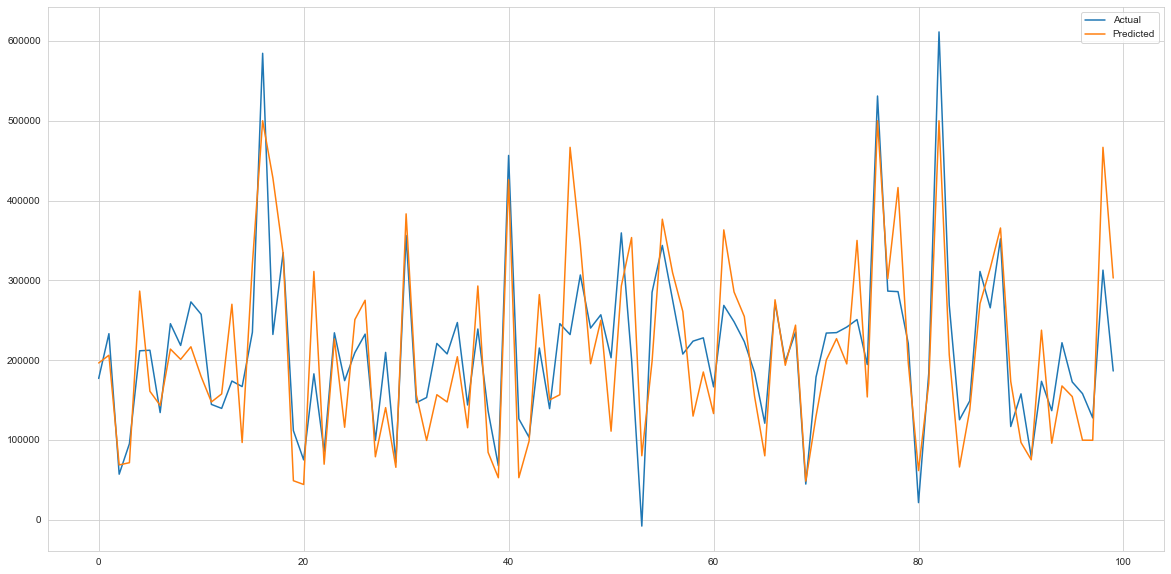

In [30]:
y_predicted = lr.predict(x_test)
resultDF = pd.DataFrame({'Predicted':y_predicted,'Actual':y_test})
resultDF = resultDF.reset_index()
resultDF = resultDF.drop(['index'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(resultDF[:100])
plt.legend(['Actual','Predicted'])

In [31]:
print("Accuracy Score:", lr.score(x_test, y_predicted)*100)

Accuracy Score: 100.0


## Build a Ridge Regression Model

In [32]:
from sklearn.linear_model import Ridge

In [33]:
X = housing_df.drop(['median_house_value','ocean_proximity'], axis=1)
Y = housing_df['median_house_value']
# splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=55)

ridge_reg = Ridge(alpha=1, solver="cholesky")
rr = ridge_reg.fit(x_train, y_train)

# get the accuracy
print("Accuracy Score:", rr.score(x_test, y_test)*100)

Accuracy Score: 65.02131268413393


In [34]:
modelName.append('Ridge Reg')
accuracyScore.append(rr.score(x_test, y_test))

## Build a Lasso Regression Model

In [35]:
from sklearn.linear_model import Lasso

In [36]:
X = housing_df.drop(['median_house_value','ocean_proximity'], axis=1)
Y = housing_df['median_house_value']
# splitting the dataset into training and testing set
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=55)

lasso_reg = Lasso(alpha=1)
lar = lasso_reg.fit(x_train, y_train)

# get the accuracy
print("Accuracy Score:", lar.score(x_test, y_test)*100)

Accuracy Score: 65.02135354631542


In [37]:
modelName.append('Lasso Reg')
accuracyScore.append(lar.score(x_test, y_test))

## Build a Decision Tree Model

In [39]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV

from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image


In [40]:
X = housing_df.drop(['median_house_value'], axis=1)
Y = housing_df['median_house_value']
pd.set_option('display.max_columns', None)

In [41]:
cfHousing_one_hot_encoded_data = pd.get_dummies(housing_df, columns = ['ocean_proximity'])
cfHousing_one_hot_encoded_data[1000:2000]

longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
1000    -121.59     39.79                  20          743             171   
1001    -121.59     39.78                  16         2754             570   
1002    -121.59     39.78                  18          945             205   
1003    -121.60     39.77                  26         1503             343   
1004    -121.61     39.77                  25         1612             313   
...         ...       ...                 ...          ...             ...   
1995    -119.84     36.84                  12         2396             290   
1996    -119.83     36.83                  14         2351             341   
1997    -119.82     36.83                  14         2982             412   
1998    -119.84     36.83                  17         3012             408   
1999    -119.82     36.83                  16         2868             376   

      population  households  median_income  median_house_value  \
1000         395         168         1.6250               88300   
1001        1063         543         1.4048               86500   
1002         385         207         2.1838               58000   
1003         699         296         1.8750               84000   
1004         837         303         2.9630               89500   
...          ...         ...            ...                 ...   
1995         863         258         8.7716              229200   
1996        1128         363         6.9903              141200   
1997        1408         423         5.3241              123000   
1998         987         362         7.4201              229700   
1999        1016         379         6.1175              144700   

      ocean_proximity_<1H OCEAN  ocean_proximity_INLAND  \
1000                          0                       1   
1001                          0                       1   
1002                          0                       1   
1003                          0                       1   
1004                          0                       1   
...                         ...                     ...   
1995                          0                       1   
1996                          0                       1   
1997                          0                       1   
1998                          0                       1   
1999                          0                       1   

      ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
1000                       0                         0   
1001                       0                         0   
1002                       0                         0   
1003                       0                         0   
1004                       0                         0   
...                      ...                       ...   
1995                       0                         0   
1996                       0                         0   
1997                       0                         0   
1998                       0                         0   
1999                       0                         0   

      ocean_proximity_NEAR OCEAN  
1000                           0  
1001                           0  
1002                           0  
1003                           0  
1004                           0  
...                          ...  
1995                           0  
1996                           0  
1997                           0  
1998                           0  
1999                           0  

[1000 rows x 14 columns]

In [42]:
X = cfHousing_one_hot_encoded_data.drop(['median_house_value'], axis=1)
Y = cfHousing_one_hot_encoded_data['median_house_value']

In [43]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.30, random_state= 55)
dtr = DecisionTreeRegressor(criterion="squared_error", max_depth=10)
dtr.fit(x_train, y_train)
dtr.score(x_train,y_train)

0.8334095588589261

In [44]:
y_pred = dtr.predict(x_test)

In [45]:
dtr.score(x_test,y_test)

0.7252092228054999

In [46]:
modelName.append('Decision Tree Reg')
accuracyScore.append(dtr.score(x_test, y_test))

In [47]:
text_representation = tree.export_text(dtr, feature_names=X.columns.to_list())
print(text_representation)

|--- median_income <= 5.05
|   |--- ocean_proximity_INLAND <= 0.50
|   |   |--- median_income <= 3.11
|   |   |   |--- longitude <= -118.28
|   |   |   |   |--- latitude <= 37.91
|   |   |   |   |   |--- longitude <= -122.40
|   |   |   |   |   |   |--- housing_median_age <= 48.50
|   |   |   |   |   |   |   |--- housing_median_age <= 19.50
|   |   |   |   |   |   |   |   |--- housing_median_age <= 15.00
|   |   |   |   |   |   |   |   |   |--- population <= 1751.50
|   |   |   |   |   |   |   |   |   |   |--- value: [220000.00]
|   |   |   |   |   |   |   |   |   |--- population >  1751.50
|   |   |   |   |   |   |   |   |   |   |--- value: [319700.00]
|   |   |   |   |   |   |   |   |--- housing_median_age >  15.00
|   |   |   |   |   |   |   |   |   |--- longitude <= -122.42
|   |   |   |   |   |   |   |   |   |   |--- value: [134100.00]
|   |   |   |   |   |   |   |   |   |--- longitude >  -122.42
|   |   |   |   |   |   |   |   |   |   |--- value: [72500.00]
|   |   |   |   |   | 

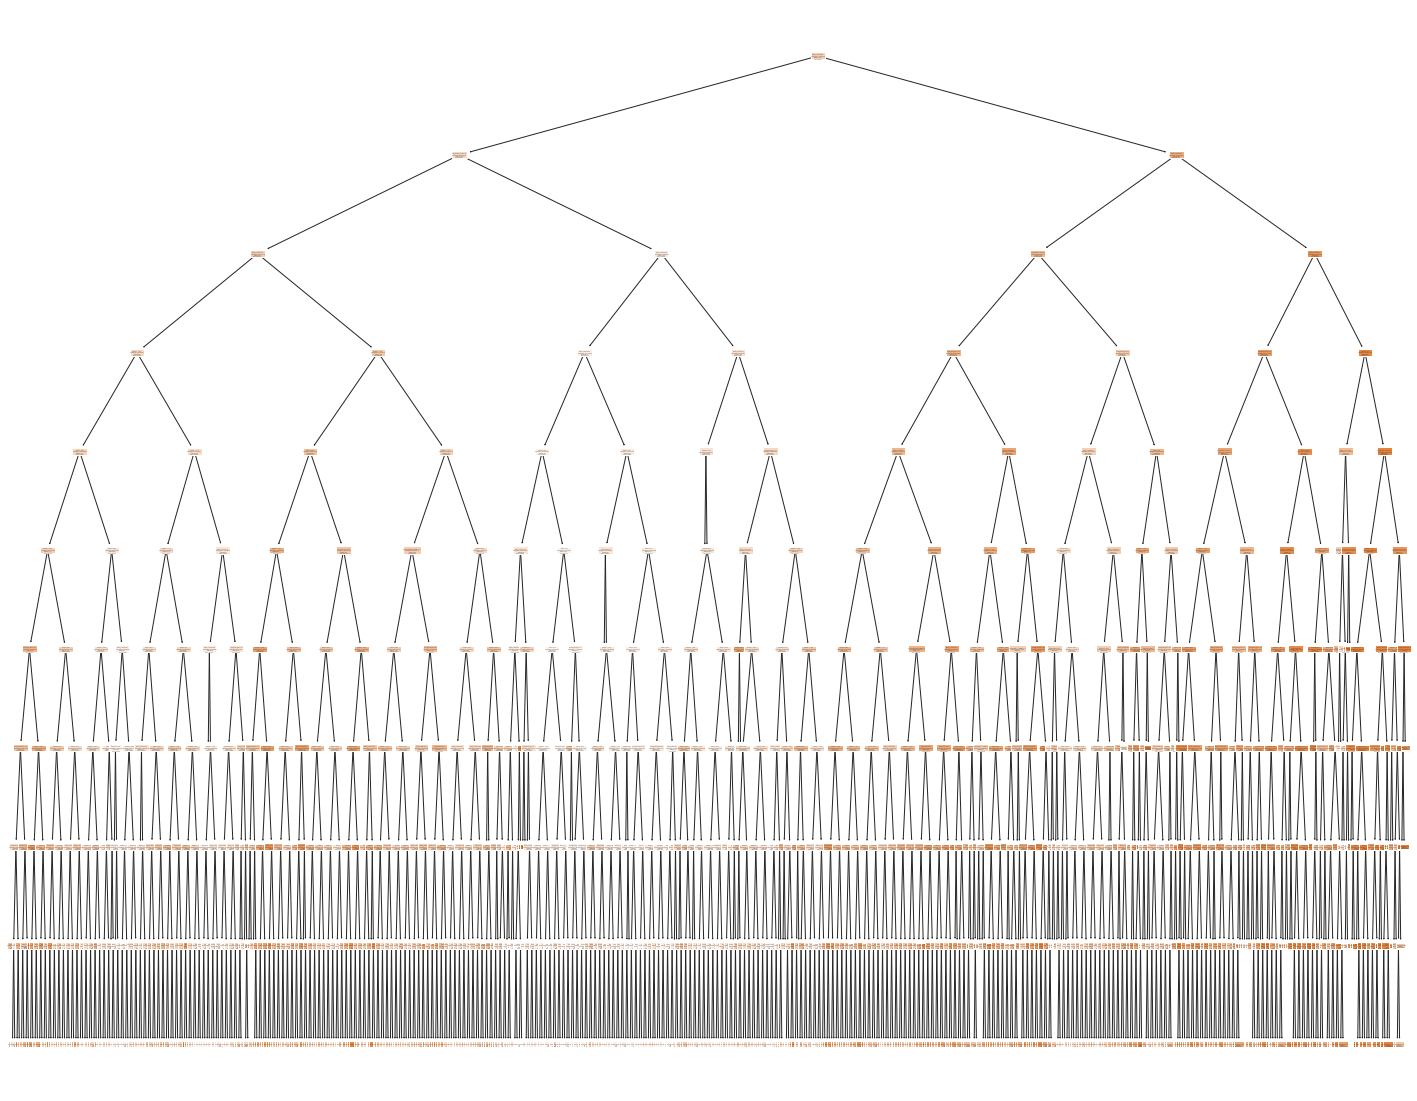

In [50]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(dtr,feature_names=X.columns.to_list(),filled = True)

In [51]:
fig.savefig('decisionTree.png')

In [52]:
from sklearn.ensemble import AdaBoostRegressor
ab_dtr = AdaBoostRegressor(DecisionTreeRegressor(criterion="squared_error", max_depth=14), 
                           n_estimators=500, random_state=10)
ab_dtr.fit(x_train, y_train)
ab_dtr.score(x_train,y_train)

0.9867920593227978

In [53]:
y_pred = ab_dtr.predict(x_test)
ab_dtr.score(x_test,y_test)

0.8218280056561681

In [54]:
modelName.append('Ada Boost Decision Tree Reg')
accuracyScore.append(ab_dtr.score(x_test, y_test))

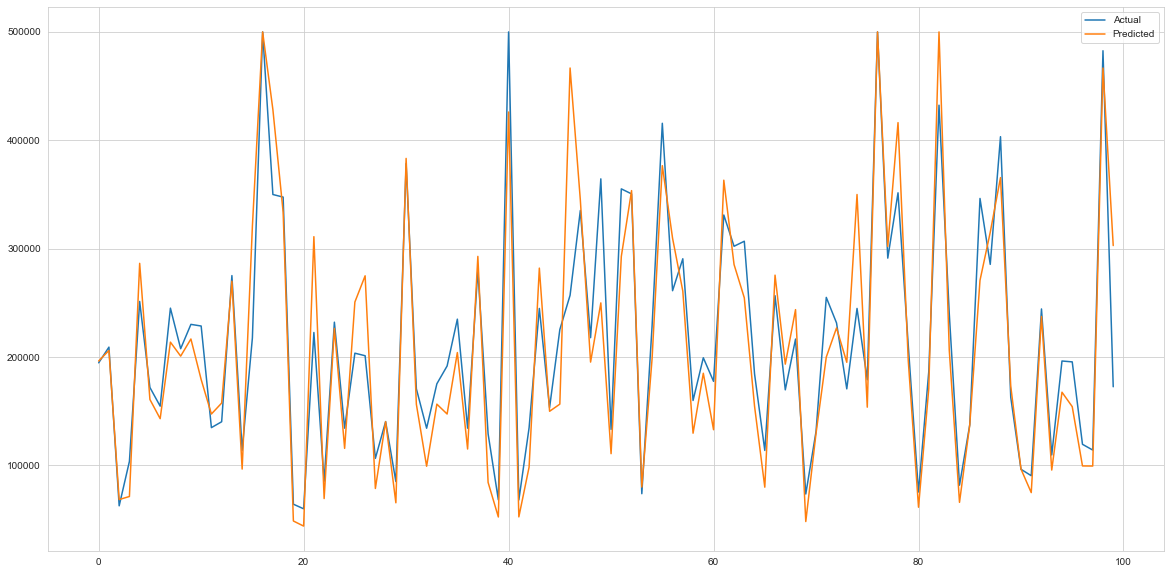

In [55]:
resultDF = pd.DataFrame({'Predicted':y_pred,'Actual':y_test})
resultDF = resultDF.reset_index()
resultDF = resultDF.drop(['index'],axis=1)
plt.figure(figsize=(20,10))
plt.plot(resultDF[:100])
plt.legend(['Actual','Predicted'])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gb_dtr = GradientBoostingRegressor(n_estimators = 500, max_depth=14, learning_rate=0.01, 
                                   loss='huber', random_state=10)
gb_dtr.fit(x_train, y_train)
gb_dtr.score(x_train,y_train)

In [ ]:
y_pred = gb_dtr.predict(x_test)
gb_dtr.score(x_test,y_test)

In [ ]:
modelName.append('Gradient Boosting Reg')
accuracyScore.append(gb_dtr.score(x_test, y_test))

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators = 250, max_depth=20, verbose=1, random_state=11)
rfr.fit(x_train, y_train)
rfr.score(x_train,y_train)

In [58]:
y_pred = rfr.predict(x_test)
rfr.score(x_test,y_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished


0.8155420088145952

In [59]:
modelName.append('Random Forest Reg')
accuracyScore.append(rfr.score(x_test, y_test))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 250 out of 250 | elapsed:    0.2s finished


In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from numpy import mean
from numpy import std